# Python Tutorial 05 - Defining New Functions and Fitting Data
## M. Virginia McSwain (Lehigh University; mcswain@lehigh.edu)

## Table of contents
* [Defining New Functions](#new)
* [Passing Parameters](#passing)
* [Lambda and Map Functions](#lambda)
* [Fitting Data to Linear or Polynomial Models](#polynomial)
* [Fitting Data to Arbitrary Functions](#arbitrary)
* [A Note on Error Analysis](#error)
* [Interpolating Between Data Points](#interpolating)

<a class="anchor" id="new"></a>
## Defining New Functions

So, you want to recycle some code and repeat the same task...  

Copying/pasting code can be problematic because 
* Errors propagate, irritating to debug
* Future modification becomes tough

Functions provide a way to easily repeat the same procedure without the brute force of repeating commands!

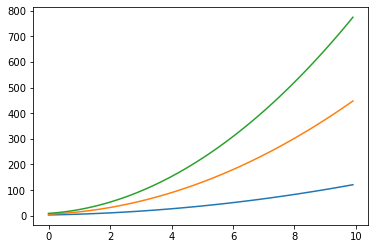

In [9]:
# import packages as necessary
import numpy as np
import matplotlib.pyplot as plt

# What not to do...
# Plot 3 different parabolas using brute force
x = np.arange(0,10,0.1)
y1 = 1*x**2 + 2*x + 3
y2 = 4*x**2 + 5*x + 6
y3 = 7*x**2 + 8*x + 9

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

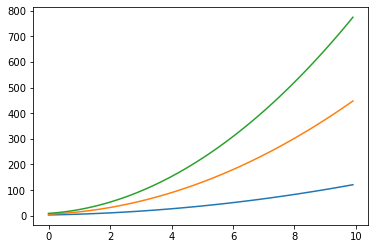

In [10]:
# Instead, define a new function to plot a generic parabola
# Does nothing by itself; requires a separate call

def parabola(x, a, b, c):
    y = a*x**2 + b*x + c
    return y

# Plot three parabolas using our new function
x=np.arange(0,10,0.1)
plt.plot (x, parabola(x, 1, 2, 3))
plt.plot (x, parabola(x, 4, 5, 6))
plt.plot (x, parabola(x, 7, 8, 9))
plt.show()


Your program should have a primary purpose along with several sub-tasks that can be farmed out to new functions.  The ```main``` action of the program can define this ultimate goal.  Having a ```main``` section can be particularly useful when there are many sub-functions, but it is not required.

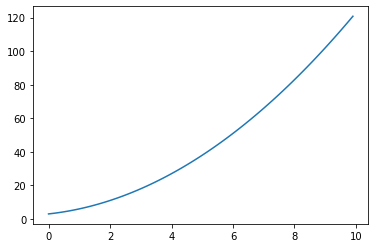

In [11]:
def parabola(x, a, b, c):
    y = a*x**2 + b*x + c
    return y

def main():                 # set up the main goals
    x = np.arange(0,10,0.1)
    plt.plot(x, parabola(x, 1, 2, 3))
    plt.show()

main()                      # executes the program


<a class="anchor" id="passing"></a>
## Passing Parameters

You can pass arrays (such as ```np.arange```) to and from functions.  BUT, passing lists (such as ```x = [1,2,3,4,5]```) doesn’t work.  It’s good programming practice to put all of your variables that will vary inside of functions.  Variables don’t have to retain the same name during passing. 

Keep constants as “global variables” outside of individual functions or main.

Typical syntax:
```
def function(param1, param2, ...):
    result = calculate something with param1, param2, ...
    return result

A_new_var = function(var1, var2, ...)
```

The code below illustrates using a new function to calculate stellar luminosity as well as the ability for the user to input values on the fly.

In [ ]:
import numpy as np

# define global variables
sigma = 5.6704e-8            # W/m^2/K^4
Rsun = 6.96e8                # m
Lsun = 3.839e26              # W

def luminosity(T, R):
    Lstar = 4*np.pi*R**2 * sigma*T**4      # SI units
    return Lstar/Lsun                      # solar units

def main():
    Rstar = float(input('Enter stellar radius (solar units): '))
    Teff = float(input('Enter effective temperature (K): '))
    print ('Stellar luminosity (solar units): ', luminosity(Teff, Rstar*Rsun))

main()

### Try it now!  

Use the partial block of code below to plot the Planck (blackbody) spectra for T = 5000 K, 10000 K, and 15000 K over the range $1000 \; Angstroms < \lambda < 10,000 \; Angstroms$.  Optional: Include a legend that identifies the 3 curves. 

$$ B_\lambda (T) = \frac{ 2 h c^2 / \lambda^5 }{e^{hc/\lambda k_B T} - 1}  $$

In [5]:
import numpy as np
import matplotlib.pyplot as plt


# fundamental constants in SI units
h = 6.62607e-34
c = 2.99792e8
k_B = 1.38065e-23


def Planck(w, T):
    # Finish the incomplete Planck function below and make your plots!
    B = np.exp(h*c/w/k_B/T)  
    return B 



# Don't call your wavelength variable "lambda" since lambda is also a Python command
w = np.arange(1000, 10000, 1)*1.e-10


# Define T and make your plots below

      


<a class="anchor" id="lambda"></a>
## Lambda and Map Functions

Disclaimer:  The ```lambda``` and ```map``` functions (I think) have questionable utility.  They are old-fashioned relics of Lisp programming and are mostly obsolete.  Apparently the original author of Python argued to have them removed in Python 3, but was overruled by the community.  I include them here because many Python help pages do it this way.  You may encounter them out in the wild, and they may be helpful in some circumstances.


```Lambdas``` are one-line functions that you might choose to use when they don’t need to be repeated within a program.  

General syntax:
```
lambda <arguments>: <manipulate(arguments)>
```

In [13]:
add = lambda x, y: x + y
print(add(3, 5))

8


In [14]:
def add(x,y):
    return x+y

print (add(3,5))

8


For short lists, Python’s built-in ```map()``` function is useful.  ```Map()``` applies a function to all items in an input list.  Some people also include lambdas within map.

In [15]:
def fahrenheit(T):
    return (9./5.*T + 32)

temp = [36.5, 37, 37.5, 38]
F = list(map(fahrenheit, temp))
print (F)

[97.7, 98.60000000000001, 99.5, 100.4]


In [16]:
# Alternate way to do this without map()
for T in temp:
    F = fahrenheit(T)
    print (F)

97.7
98.60000000000001
99.5
100.4


In [17]:
def fcn(x):
    return x**2

x = [1,2,3,4,5]
#y = x**2                       # doesn’t work with lists
y = list(map(fcn, x))           # our new function can do it!
print (y)

[1, 4, 9, 16, 25]


<a class="anchor" id="polynomial"></a>
## Fitting Data to Linear or Polynomial Models

Many pre-existing fitting packages exist for simple functions, such as lines or polynomials.  The more general program **`curve_fit`** can fit any user-defined function.

Let's start with two sets of time-variable data that need fitting...

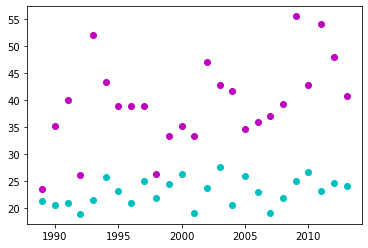

In [18]:
dir = 'Example Data Files/'

# read in the sample data file
data = np.loadtxt(dir+'fitdata.txt')
x=data[:,0]                            # save the first column to variable x 
y1, y2 = data[:,1], data[:,2]          # shortcut to save multiple columns
plt.plot(x,y1,'co')
plt.plot(x,y2,'mo')
plt.show()

We can fit these two data sets with linear models (polynomials of degree 1).  Here, I've plotted the original data along with their best-fit lines.  (If you wanted to fit the data to a parabola, use `degree=2` instead.)

[ 1.21976923e-01 -2.20999423e+02]


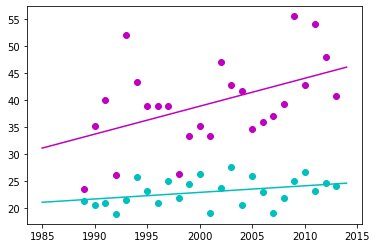

In [21]:
fit1 = np.polyfit(x, y1, 1)             # linear fit (degree = 1)
fit2 = np.polyfit(x, y2, 1)
print (fit1)                            # contains slope, y-intercept (y = c0*x + c1)

# Determine the resulting best fit lines
xmodel = np.arange(1985,2015,1)   # a dense array of time values
y1model = np.poly1d(fit1)         # best fit model for y1
y2model = np.poly1d(fit2)         # best fit model for y2

# Plot the original data points with the models
plt.plot(x,y1,'co')
plt.plot(x,y2,'mo')
plt.plot(xmodel, y1model(xmodel), 'c')
plt.plot(xmodel, y2model(xmodel), 'm')

plt.show()


<a class="anchor" id="arbitrary"></a>
## Fitting Data to Arbitrary Functions

In this example, we will make up some fake data (with random noise!) to represent an exponential decay.  We will define a new function **`expFunc`** that can both generate the fake data and also help us fit an exponential model to the data.  

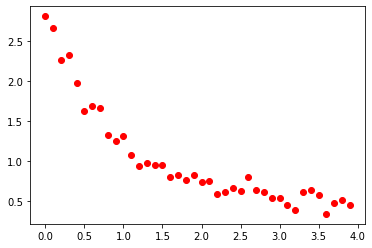

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def expFunc(x, a, b, c):
    return a*np.exp(-b*x) + c

# make up some fake data 
x = np.arange(0,4,0.1)
temp = expFunc(x, 2.5, 1.3, 0.5)
noisy = temp + 0.1*np.random.normal(size=len(temp))

plt.plot(x,noisy, 'ro')
plt.show()

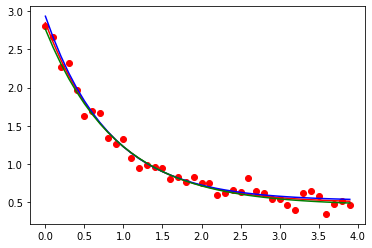

In [4]:
# Fit the noisy data to our exponential model.
# New variables fitParams and fitCovariances contain the fit and its errors.
fitParams, fitCovariances = curve_fit(expFunc, x, noisy)

# 1-sigma error bars on each fitting parameter
sigma = np.sqrt( [fitCovariances[0,0], \
                  fitCovariances[1,1], \
                  fitCovariances[2,2] ] )

# best fit curve with the ± 1σ errors
bestfit = expFunc(x, fitParams[0], fitParams[1], fitParams[2])
errcurve1 = expFunc(x, fitParams[0] + sigma[0], fitParams[1] + sigma[1], fitParams[2] + sigma[2])
errcurve2 = expFunc(x, fitParams[0] - sigma[0], fitParams[1] - sigma[1], fitParams[2] - sigma[2])
plt.plot(x, noisy, 'ro')
plt.plot(x, bestfit, 'r')
plt.plot(x, errcurve1, 'b')
plt.plot(x, errcurve2, 'g')
plt.show()

### Try it now!

Write a code to generate some fake sinusoidal data and fit it with the curve

$$
f(x) = A \sin (Bx - C) + D
$$

<a class="anchor" id="error"></a>
## A Note on Error Analysis

**Variance** is the variability or spread in a single parameter fit.

**Covariance** describes the variability when simultaneously fitting multiple parameters.  Parameter ```a``` may vary with ```b```, ```b``` may vary with ```c```, etc.  Also, parameter ```a``` may vary with itself (this is the error inherent in that parameter).

The square root of the diagonals of the covariance matrix represent the **1-sigma errors** (68% confidence region) of each fitting parameter.

A very nice tutorial on covariance is available at
	http://stattrek.com/matrix-algebra/covariance-matrix.aspx .

<a class="anchor" id="interpolating"></a>
## Interpolating Between Data Points

### Example 1

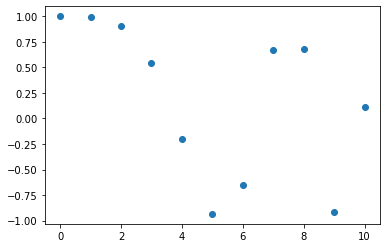

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Generate some fake data points
x = np.linspace(0, 10, num=11)
y = np.cos(-x**2/9.0)

plt.plot(x,y,'o')
plt.show()

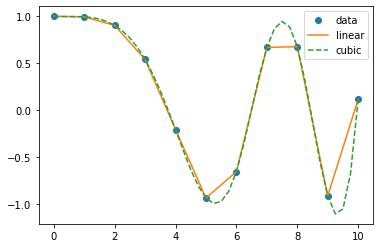

-0.3892349158132242


In [25]:
f = interp1d(x, y)                  # linear interpolation between data points
f2 = interp1d(x, y, kind='cubic')   # cubic interpolation between data points
xnew = np.linspace(0, 10, num=41)   # a finely spaced x-grid to plot the new interpolations on


plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()
xval = 6.2
print (f(xval))

### Example 2

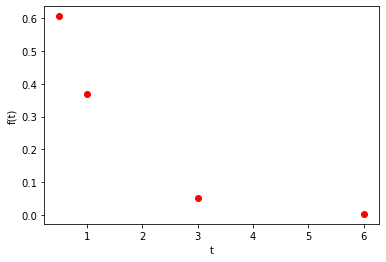

In [26]:
t = [0.5, 1, 3, 6]
f = [0.6065, 0.3679, 0.0498, 0.0025]

plt.plot(t,f,'ro')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

0.20885


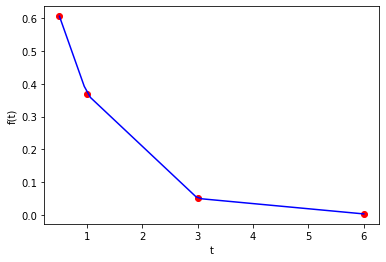

In [27]:
# The interp1d function performs linear interpolation by default.
g = interp1d(t, f)              # default is linear interpolation

x = np.linspace(0.5, 6)
fit = g(x)

# What value does our interpolation model predict at t = 2?
print (g(2))

plt.plot(t,f,'ro')
plt.plot(x,fit,'b',label='fit')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

0.1084818181818181


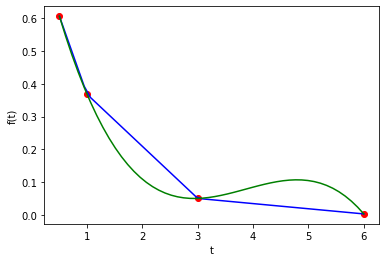

In [28]:
# Improve our interpolation with a third-order polynomial
g2 = interp1d(t, f, 'cubic')
fit2=g2(x)
print (g2(2))

plt.plot(t,f,'ro')
plt.plot(x,fit,'b',label='fit')
plt.plot(x,fit2,'g',label='fit2')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

Note that the original data has more of an exponentially decreasing trend.  This is a good illustration of why it's a bad idea to blindly rely upon interpolation!

### Reverse Interpolation
Where does ```y = 0.5```?  You can perform the interpolation in reverse order to find out!

In [29]:
inverse_g2 = interp1d(f, t, 'cubic')
#inverse_g2 = interp1d(f[::-1], t[::-1], 'cubic')   # Reverses the list order to keep values monotonically increasing.  Obsolete.

print (inverse_g2(0.5))

2.178024492163778


### Other Potential Hazards in Interpolation

In older versions of Python, it seems that data points had to be monotonically increasing in order for interpolation to work properly.  This issue does not seem to be a problem in Python 3. 

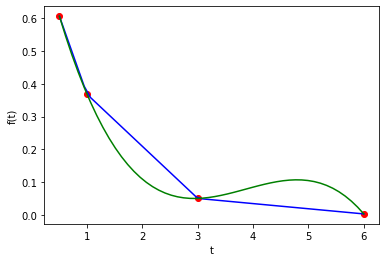

In [30]:
# Same data points as before, but mixed order
t = [0.5, 6, 1, 3]
f = [0.6065, 0.0025, 0.3679, 0.0498]

g2 = interp1d(t, f, 'cubic')
fit2=g2(x)

plt.plot(t,f,'ro')
plt.plot(x,fit,'b',label='fit')
plt.plot(x,fit2,'g',label='fit2')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()